# Analyse Exploratoire des Données - E-commerce Sales

**Projet:** Artefact Data Engineer Challenge
**Date:** Janvier 2026
**Objectif:** Analyser le dataset de ventes e-commerce et proposer une modélisation en **3FN** (Troisième Forme Normale)

---

## 1. Introduction & Objectifs

### Contexte
Ce notebook présente l'analyse exploratoire d'un dataset de ventes e-commerce.
L'objectif principal est d'**identifier la structure des données**, détecter les **redondances** et préparer une **modélisation relationnelle en 3ème Forme Normale**.

### Objectifs principaux
- Comprendre la structure et le contenu du fichier CSV
- Identifier les entités métier (clients, produits, commandes, ventes)
- Détecter les dépendances fonctionnelles
- Évaluer la qualité des données (manquants, doublons, cohérence)
- Proposer un schéma normalisé en 3FN avec justification

---

## 2. Chargement & Préparation initiale


In [37]:
from idlelib.iomenu import errors

# Import des bibliothèques essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings


warnings.filterwarnings('ignore')

# Configuration affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Style graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Environnement prêt")

✅ Environnement prêt


In [38]:
# Chargement du fichier CSV
csv_path = '../data/fashion_store_sales.csv'
try:
    df = pd.read_csv(csv_path)
    print(f"✅ Dataset chargé avec succès")
    print(f"📊 Dimensions: {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
except FileNotFoundError:
    print(f"❌ Erreur: Le fichier '{csv_path}' n'a pas été trouvé")
    print("💡 Conseil: Vérifiez le chemin du fichier ou placez le CSV dans le même répertoire que le notebook")


✅ Dataset chargé avec succès
📊 Dimensions: 2,253 lignes × 29 colonnes


## 3. Vue d'ensemble des données
### 3.1 Aperçu des premières lignes

In [39]:
# Affichage des 10 premières lignes
print("📋 Aperçu des premières lignes du dataset:")
df.head(10)

📋 Aperçu des premières lignes du dataset:


,sale_date,item_id,sale_id,product_id,quantity,original_price,unit_price,discount_applied,discount_percent,discounted,item_total,channel,channel_campaigns,total_amount,product_name,category,brand,color,size,catalog_price,cost_price,customer_id,gender,age_range,signup_date,first_name,last_name,email,country
0,2025-06-16,2270,658,403,1,81.80,81.80,0.0,0.00%,0,81.80,App Mobile,App Mobile,374.25,Elegant Satin Dress,Dresses,Tiva,Red,L,81.80,45.12,835,Female,46-55,2025-04-26,Dusty,Comerford,dcomerfordn6@google.nl,Portugal
1,2025-06-17,1170,336,284,1,81.79,81.79,0.0,0.00%,0,81.79,E-commerce,Website Banner,536.47,Essential Cotton Shoes,Shoes,Tiva,White,35,81.79,35.02,790,Female,16-25,2025-04-26,Beale,Seeds,bseedslx@phpbb.com,France
2,2025-04-16,2496,1255,71,1,80.76,80.76,0.0,0.00%,0,80.76,App Mobile,App Mobile,104.81,Modern Ribbed Trousers,Pants,Tiva,Red,XL,80.76,51.01,464,Female,36-45,2025-04-14,Juan,Blacklock,jblacklockcv@discuz.net,Germany
3,2025-05-06,1273,331,98,1,78.52,78.52,0.0,0.00%,0,78.52,App Mobile,App Mobile,263.87,Modern Boxy Shoes,Shoes,Tiva,Black,38,78.52,41.48,100,Female,26-35,2025-01-30,Godfry,Cockerill,gcockerill2r@vimeo.com,Italy
4,2025-06-15,1829,1079,98,1,78.52,78.52,0.0,0.00%,0,78.52,App Mobile,App Mobile,173.84,Modern Boxy Shoes,Shoes,Tiva,Black,38,78.52,41.48,837,Female,46-55,2025-03-02,NaN,Kilby,lkilbyn8@wordpress.com,Germany
5,2025-04-14,3221,478,98,1,78.52,78.52,0.0,0.00%,0,78.52,App Mobile,App Mobile,162.44,Modern Boxy Shoes,Shoes,Tiva,Black,38,78.52,41.48,957,Female,16-25,2025-01-18,Amandie,Lotterington,alotteringtonqk@cbc.ca,France
6,2025-04-06,2442,1082,257,1,77.90,77.90,0.0,0.00%,0,77.90,App Mobile,App Mobile,298.60,Relaxed Crew Shoes,Shoes,Tiva,Blue,40,77.90,53.04,774,Female,46-55,2025-05-21,Auria,Gladdifh,agladdifhlh@spotify.com,Portugal
7,2025-04-21,730,747,413,1,76.15,76.15,0.0,0.00%,0,76.15,App Mobile,App Mobile,250.93,Elegant Satin Shoes,Shoes,Tiva,Black,40,76.15,52.18,442,Female,16-25,2025-04-22,Reinald,Vial,NaN,Germany
8,2025-05-29,2917,258,392,1,75.47,75.47,0.0,0.00%,0,75.47,E-commerce,Website Banner,439.49,Elegant Wrap Shoes,Shoes,Tiva,Black,40,75.47,39.53,94,Female,16-25,2025-04-04,Karine,Confait,kconfait2l@archive.org,France
9,2025-05-20,3142,1144,392,1,75.47,75.47,0.0,0.00%,0,75.47,E-commerce,Website Banner,141.99,Elegant Wrap Shoes,Shoes,Tiva,Black,40,75.47,39.53,700,Female,16-25,2025-03-08,Dalston,Daine,ddainejf@e-recht24.de,Portugal


### 3.2 Structure des colonnes

In [40]:
# Informations générales sur le dataset
print(" 📊 Informations sur la structure du dataset:")
df.info()

 📊 Informations sur la structure du dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sale_date          2253 non-null   object 
 1   item_id            2253 non-null   int64  
 2   sale_id            2253 non-null   int64  
 3   product_id         2253 non-null   int64  
 4   quantity           2253 non-null   int64  
 5   original_price     2253 non-null   float64
 6   unit_price         2253 non-null   float64
 7   discount_applied   2253 non-null   float64
 8   discount_percent   2253 non-null   object 
 9   discounted         2253 non-null   int64  
 10  item_total         2253 non-null   float64
 11  channel            2253 non-null   object 
 12  channel_campaigns  2253 non-null   object 
 13  total_amount       2028 non-null   float64
 14  product_name       2253 non-null   object 
 15  category           2253 non

In [41]:
# Types de données détaillés
print("\n🔍 Types de données par colonne:")
print(df.dtypes)

# Création du mapping Pandas → PostgreSQL
type_mapping = pd.DataFrame({
    'Colonne': df.columns,
    'Type Pandas': df.dtypes.values,
    'Type SQL recommandé': [
        'DATE',                # sale_date
        'INTEGER',             # item_id
        'INTEGER',             # sale_id
        'INTEGER',             # product_id
        'INTEGER',             # quantity
        'NUMERIC(10,2)',       # original_price
        'NUMERIC(10,2)',       # unit_price
        'NUMERIC(10,2)',       # discount_applied
        'NUMERIC(5,4)',         # discount_percent
        'BOOLEAN',             # discounted
        'NUMERIC(10,2)',       # item_total
        'VARCHAR(50)',         # channel
        'VARCHAR(100)',        # channel_campaigns
        'NUMERIC(12,2)',       # total_amount
        'VARCHAR(255)',        # product_name
        'VARCHAR(100)',        # category
        'VARCHAR(100)',        # brand
        'VARCHAR(50)',         # color
        'VARCHAR(20)',         # size
        'NUMERIC(10,2)',       # catalog_price
        'NUMERIC(10,2)',       # cost_price
        'INTEGER',             # customer_id
        'VARCHAR(10)',         # gender
        'VARCHAR(20)',         # age_range
        'DATE',                # signup_date
        'VARCHAR(100)',        # first_name
        'VARCHAR(100)',        # last_name
        'VARCHAR(255)',        # email
        'VARCHAR(100)'         # country
    ]
})

print("\n📋 Mapping des types de données (Pandas → PostgreSQL):")
print(type_mapping.to_string(index=False))



🔍 Types de données par colonne:
sale_date             object
item_id                int64
sale_id                int64
product_id             int64
quantity               int64
original_price       float64
unit_price           float64
discount_applied     float64
discount_percent      object
discounted             int64
item_total           float64
channel               object
channel_campaigns     object
total_amount         float64
product_name          object
category              object
brand                 object
color                 object
size                  object
catalog_price        float64
cost_price           float64
customer_id            int64
gender                object
age_range             object
signup_date           object
first_name            object
last_name             object
email                 object
country               object
dtype: object

📋 Mapping des types de données (Pandas → PostgreSQL):
          Colonne Type Pandas Type SQL recommandé
       

### 3.3 Statistiques descriptives

In [42]:
# Statistiques sur toutes les colonnes
print("📈 Statistiques descriptives (colonnes numériques):")
df.describe()

📈 Statistiques descriptives (colonnes numériques):


,item_id,sale_id,product_id,quantity,original_price,unit_price,discount_applied,discounted,item_total,total_amount,catalog_price,cost_price,customer_id
count,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2028.000000,2253.000000,2253.000000,2253.000000
mean,1696.373724,613.966711,254.117621,2.980470,49.321185,48.141074,1.180129,0.098535,143.913298,372.860449,49.321185,27.153964,503.597870
std,964.499872,383.218568,145.214862,1.420658,13.077055,13.373302,3.996179,0.298103,82.153406,152.768703,13.077055,8.639542,290.481602
min,2.000000,2.000000,1.000000,1.000000,13.510000,11.680000,0.000000,0.000000,13.510000,45.500000,13.510000,6.850000,1.000000
25%,877.000000,288.000000,127.000000,2.000000,39.340000,38.490000,0.000000,0.000000,74.700000,257.310000,39.340000,20.730000,235.000000
50%,1679.000000,559.000000,253.000000,3.000000,49.760000,47.730000,0.000000,0.000000,130.500000,365.085000,49.760000,26.380000,505.000000
75%,2515.000000,942.000000,383.000000,4.000000,58.340000,57.350000,0.000000,0.000000,198.750000,472.800000,58.340000,32.740000,759.000000
max,3367.000000,1352.000000,500.000000,5.000000,85.900000,85.900000,24.510000,1.000000,403.800000,859.380000,85.900000,53.760000,999.000000


In [43]:
# Statistiques sur les colonnes textuelles
print("📈 Statistiques descriptives (colonnes textuelles):")
df.describe(include='object')

📈 Statistiques descriptives (colonnes textuelles):


,sale_date,discount_percent,channel,channel_campaigns,product_name,category,brand,color,size,gender,age_range,signup_date,first_name,last_name,email,country
count,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253,2137,2189,2029,2253
unique,51,3,2,4,499,5,1,5,9,1,5,140,535,564,523,6
top,2025-05-31,0.00%,E-commerce,Website Banner,Modern Satin Set,T-Shirts,Tiva,Blue,XS,Female,36-45,2025-03-03,Gian,Callum,pquogan2q@omniture.com,Germany
freq,63,2031,1170,1151,11,492,2253,485,493,2253,477,61,21,20,18,537


In [44]:
# Cardinalités détaillées
print("📊 Cardinalités des colonnes:")
print(f"{'Colonne':<20} {'Valeurs uniques':<20} {'Pourcentage':<15}")
print("-" * 55)
for col in df.columns:
        n_unique = df[col].nunique()
        pct = (n_unique / len(df)) * 100
        print(f"{col:<20} {n_unique:<20,} {pct:>6.1f}%")
# Création d'un DataFrame pour visualisation
cardinality_df = pd.DataFrame({
    'Colonne': df.columns,
    'Valeurs_uniques': [df[col].nunique() for col in df.columns],
    'Total_lignes': len(df)
})
cardinality_df['Pourcentage'] = (cardinality_df['Valeurs_uniques'] /cardinality_df['Total_lignes'] * 100).round(1)

print("\n📊 DataFrame récapitulatif :")
print(cardinality_df)


📊 Cardinalités des colonnes:
Colonne              Valeurs uniques      Pourcentage    
-------------------------------------------------------
sale_date            51                      2.3%
item_id              2,253                 100.0%
sale_id              905                    40.2%
product_id           499                    22.1%
quantity             5                       0.2%
original_price       475                    21.1%
unit_price           638                    28.3%
discount_applied     182                     8.1%
discount_percent     3                       0.1%
discounted           2                       0.1%
item_total           1,555                  69.0%
channel              2                       0.1%
channel_campaigns    4                       0.2%
total_amount         896                    39.8%
product_name         499                    22.1%
category             5                       0.2%
brand                1                       0.0%
color  

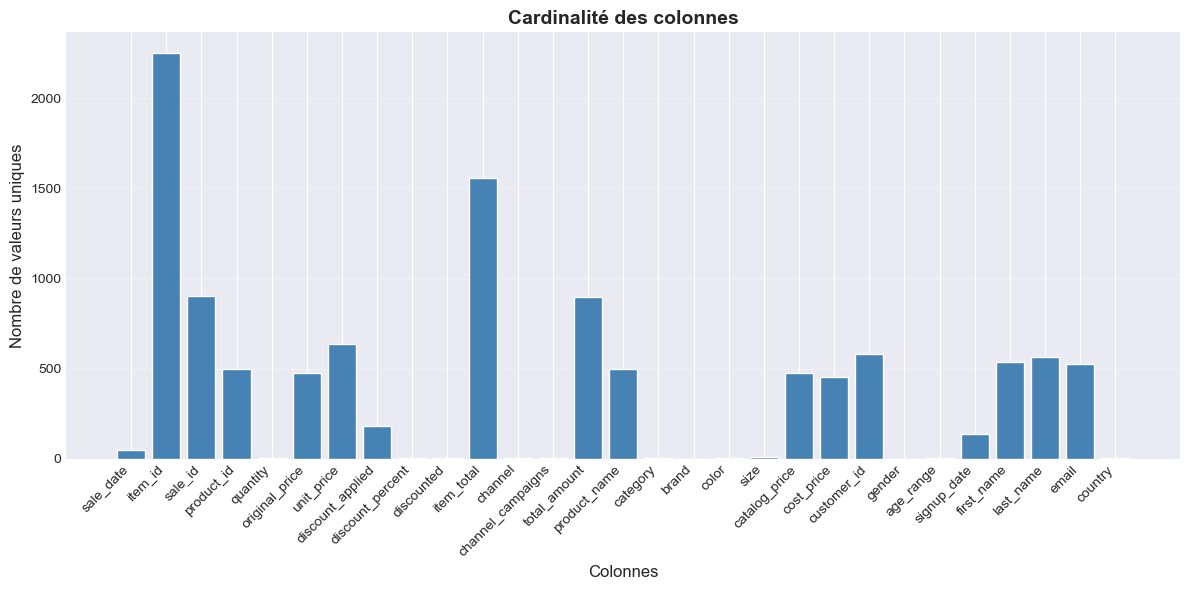

In [45]:
# Visualisation des cardinalités
plt.figure(figsize=(12, 6))
plt.bar(cardinality_df['Colonne'], cardinality_df['Valeurs_uniques'], color='steelblue')
plt.xlabel('Colonnes', fontsize=12)
plt.ylabel('Nombre de valeurs uniques', fontsize=12)
plt.title('Cardinalité des colonnes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 4. Qualité des données
### 4.1 Valeurs manquantes

In [46]:
# Vérification des valeurs NULL
null_counts = df.isnull().sum()
null_pct = (df.isnull().sum() / len(df)) * 100

quality_report = pd.DataFrame({
    'Colonne': df.columns,
    'Valeurs_NULL': null_counts.values,
    'Pourcentage': null_pct.values
    })

print("🔍 Rapport de valeurs manquantes:")
print(quality_report.to_string(index=False))

# Alerte si des NULL sont détectés
if null_counts.sum() == 0:
    print("✅ Aucune valeur manquante détectée - Qualité excellente!")
else:
    print(f"⚠️  {null_counts.sum():,} valeurs manquantes détectées au total")
    print("Colonnes concernées:")
    print(quality_report[quality_report['Valeurs_NULL'] > 0].to_string(index=False))


🔍 Rapport de valeurs manquantes:
          Colonne  Valeurs_NULL  Pourcentage
        sale_date             0     0.000000
          item_id             0     0.000000
          sale_id             0     0.000000
       product_id             0     0.000000
         quantity             0     0.000000
   original_price             0     0.000000
       unit_price             0     0.000000
 discount_applied             0     0.000000
 discount_percent             0     0.000000
       discounted             0     0.000000
       item_total             0     0.000000
          channel             0     0.000000
channel_campaigns             0     0.000000
     total_amount           225     9.986684
     product_name             0     0.000000
         category             0     0.000000
            brand             0     0.000000
            color             0     0.000000
             size             0     0.000000
    catalog_price             0     0.000000
       cost_price     

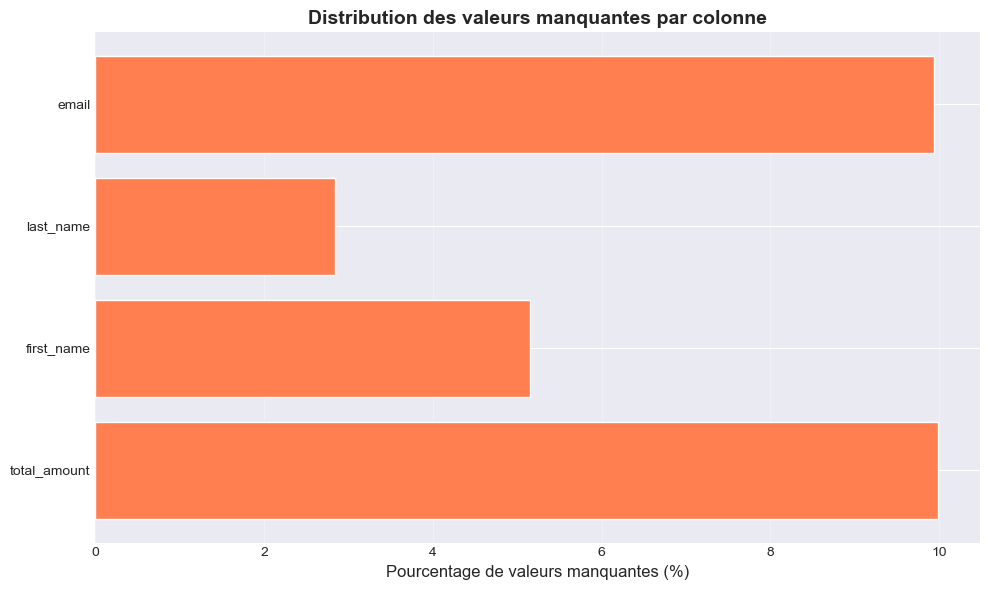

In [47]:
# Visualisation des valeurs manquantes (si existantes)
if null_counts.sum() > 0:
    plt.figure(figsize=(10, 6))
    null_data = quality_report[quality_report['Valeurs_NULL'] > 0]
    plt.barh(null_data['Colonne'], null_data['Pourcentage'], color='coral')
    plt.xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
    plt.title('Distribution des valeurs manquantes par colonne', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

### 4.2 Doublons

In [48]:
# Vérification des lignes complètement dupliquées
n_duplicates = df.duplicated().sum()
print(f"🔍 Doublons complets (toutes colonnes identiques): {n_duplicates:,}")

if n_duplicates > 0:
    print(f"   ⚠️  {(n_duplicates/len(df)*100):.2f}% du dataset")
    print("📋 Exemples de lignes dupliquées:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10))
else:
    print("   ✅ Aucun doublon complet détecté")

🔍 Doublons complets (toutes colonnes identiques): 0
   ✅ Aucun doublon complet détecté


In [49]:
# Vérification des doublons sur la clé métier
# Un produit ne devrait apparaître qu'une seule fois par commande

key_columns = ['sale_id', 'product_id']
duplicates_key = df.duplicated(subset=key_columns).sum()

print(f"🔍 Doublons sur la clé métier : {duplicates_key:,}")

if duplicates_key > 0:
    print(f"   ⚠️  {(duplicates_key/len(df)*100):.2f}% du dataset")
    print("📋 Exemples de doublons sur la clé métier:")
    duplicates = df[df.duplicated(subset=key_columns, keep=False)].sort_values(by=key_columns)
    print(duplicates.head(10))
    print("💡 Action recommandée: Investiguer ces doublons - s'agit-il d'erreurs de saisie?")
else:
    print("   ✅ Aucun doublon détecté sur la clé métier")
    print("   ℹ️  Chaque produit apparaît une seule fois par commande")


🔍 Doublons sur la clé métier : 2
   ⚠️  0.09% du dataset
📋 Exemples de doublons sur la clé métier:
       sale_date  item_id  sale_id  product_id  quantity  original_price  unit_price  discount_applied discount_percent  discounted  item_total     channel channel_campaigns  total_amount         product_name   category brand  color size  catalog_price  cost_price  customer_id  gender age_range signup_date first_name  last_name                    email country
1262  2025-06-16     2458     1095          85         3           37.35       37.35               0.0            0.00%           0      112.05  E-commerce    Website Banner        261.45  Classic Satin Dress    Dresses  Tiva    Red   XS          37.35       18.42          109  Female     26-35  2025-04-17     Caspar    Alphege  calphege30@amazon.co.jp  France
1709  2025-06-16     2931     1095          85         4           37.35       37.35               0.0            0.00%           0      149.40  E-commerce    Website Banner  

## 5. Analyse des entités métier

## 5. Identification des entités métier


À partir de l'analyse des colonnes, les entités suivantes sont identifiées :


- **Client** : informations personnelles et démographiques
- **Produit** : caractéristiques du produit vendu
- **Commande** : transaction globale
- **Ligne de commande / Vente** : détail d'un produit dans une commande
- **Date** : dimension temporelle


Ces entités seront utilisées dans la phase de modélisation relationnelle.

### 5.1 Clients

In [50]:
print("Nombre clients uniques :", df['customer_id'].nunique())

# Vérification dépendance fonctionnelle
client_names = df.groupby('customer_id')['first_name'].nunique()
print("Clients avec plusieurs noms différents :", (client_names > 1).sum())

Nombre clients uniques : 580
Clients avec plusieurs noms différents : 0


### 5.2 Produits

In [51]:
print("Nombre produits uniques :", df['product_name'].nunique())

product_price_stats = df.groupby('product_name')['unit_price'].agg(['min','max','mean','count'])
product_price_stats['variation'] = product_price_stats['max'] - product_price_stats['min']

print("\nProduits avec variation de prix :", len(product_price_stats.query('variation > 0')))
print("→ Recommandation : conserver unit_price dans la table de fait (ventes)")

Nombre produits uniques : 499

Produits avec variation de prix : 176
→ Recommandation : conserver unit_price dans la table de fait (ventes)


### 5.3 Commandes

In [52]:
order_analysis = df.groupby('sale_id').agg({
    'customer_id': 'nunique',
    'sale_date': 'nunique',
    'product_name': 'count'
}).rename(columns={
    'customer_id':'nb_clients',
    'sale_date':'nb_dates',
    'product_name':'nb_lignes'
})

print("Statistiques par commande :")
print(order_analysis.describe())

print("\nCommandes avec plusieurs clients :", (order_analysis['nb_clients'] > 1).sum())
print("Commandes avec plusieurs dates   :", (order_analysis['nb_dates'] > 1).sum())

Statistiques par commande :
       nb_clients  nb_dates   nb_lignes
count       905.0     905.0  905.000000
mean          1.0       1.0    2.489503
std           0.0       0.0    0.500166
min           1.0       1.0    2.000000
25%           1.0       1.0    2.000000
50%           1.0       1.0    2.000000
75%           1.0       1.0    3.000000
max           1.0       1.0    3.000000

Commandes avec plusieurs clients : 0
Commandes avec plusieurs dates   : 0


## 6. Détection des anomalies métier

### 6.1 Prix et quantités

In [53]:
x = df[(df['quantity'] <= 0) | (df['unit_price'] < 0)]
print("aucunes anomalies détectées" if x.shape[0]==0 else x )

aucunes anomalies détectées


### 6.2 Remises incohérentes

In [54]:
temp_df = df.copy()

# --- NETTOYAGE DU POURCENTAGE ---
if temp_df['discount_percent'].dtype == 'object':
      # 1. On retire le signe %
      # 2. On convertit en float
      # Résultat : "15.50%" devient 15.50 (compatible DECIMAL(5,2))
     temp_df['discount_percent'] = pd.to_numeric(
    temp_df['discount_percent'].str.replace('%', '', regex=False),
    errors='coerce'
)


# Sécurité supplémentaire : s'assurer qu'on ne dépasse pas 100
temp_df['discount_percent'] = temp_df['discount_percent'].fillna(0.0)

x = temp_df[(temp_df['discount_percent'] > 100) | (temp_df['discount_percent'] < 0)]
print("aucunes anomalies détectées" if x.shape[0]==0 else x )

aucunes anomalies détectées


### 6.3 dates incohérentes

In [55]:
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

print("Dates invalides :", df['sale_date'].isna().sum())
print("Plage dates     :", df['sale_date'].min(), "→", df['sale_date'].max())

print("\nPrix négatifs ou nuls :", (df['unit_price'] <= 0).sum())
print("Quantités négatives ou nulles :", (df['quantity'] <= 0).sum())

Dates invalides : 0
Plage dates     : 2025-04-04 00:00:00 → 2025-06-17 00:00:00

Prix négatifs ou nuls : 0
Quantités négatives ou nulles : 0


# SAUVEGARDE DU NOTEBOOK AU FORMAT PDF

In [56]:
!jupyter nbconvert --to html analyse_exploratoire.ipynb
# ouvrir le fichier html
# faire ctrl+p puis appuyer sur imprimer pour télécharger le ficher en pdf

[NbConvertApp] Converting notebook analyse_exploratoire.ipynb to html
[NbConvertApp] Writing 333212 bytes to analyse_exploratoire.html
